In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('example_wp_log_peyton_manning.csv')

In [ ]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


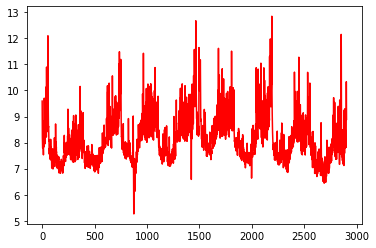

In [ ]:
plt.plot(df['y'], label='vraies valeurs', color='r')

In [ ]:
m=Prophet()

In [ ]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=365) #On rajoute 365 jours de plus à la période utilisée dans le fit.

In [ ]:
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [ ]:
forecast=m.predict(future)        # yhat=y_predict
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.038509,8.167288,9.426431,8.038509,8.038509,0.803012,0.803012,0.803012,0.352283,0.352283,0.352283,0.450729,0.450729,0.450729,0.0,0.0,0.0,8.841521
1,2007-12-11,8.036976,7.978693,9.240422,8.036976,8.036976,0.553114,0.553114,0.553114,0.119631,0.119631,0.119631,0.433483,0.433483,0.433483,0.0,0.0,0.0,8.590090
2,2007-12-12,8.035443,7.797158,9.030414,8.035443,8.035443,0.350515,0.350515,0.350515,-0.066656,-0.066656,-0.066656,0.417171,0.417171,0.417171,0.0,0.0,0.0,8.385958
3,2007-12-13,8.033910,7.704983,8.992520,8.033910,8.033910,0.329968,0.329968,0.329968,-0.072272,-0.072272,-0.072272,0.402239,0.402239,0.402239,0.0,0.0,0.0,8.363878
4,2007-12-14,8.032377,7.743181,8.957704,8.032377,8.032377,0.319515,0.319515,0.319515,-0.069577,-0.069577,-0.069577,0.389092,0.389092,0.389092,0.0,0.0,0.0,8.351892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.195686,7.427723,8.974454,6.840257,7.533053,1.017984,1.017984,1.017984,0.048306,0.048306,0.048306,0.969678,0.969678,0.969678,0.0,0.0,0.0,8.213670
3266,2017-01-16,7.194670,7.714389,9.298447,6.838158,7.533734,1.344002,1.344002,1.344002,0.352283,0.352283,0.352283,0.991720,0.991720,0.991720,0.0,0.0,0.0,8.538673
3267,2017-01-17,7.193654,7.608754,9.072359,6.836058,7.534482,1.132450,1.132450,1.132450,0.119631,0.119631,0.119631,1.012819,1.012819,1.012819,0.0,0.0,0.0,8.326104
3268,2017-01-18,7.192638,7.409265,8.874615,6.833958,7.535028,0.966117,0.966117,0.966117,-0.066656,-0.066656,-0.066656,1.032774,1.032774,1.032774,0.0,0.0,0.0,8.158756


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.841521,8.167288,9.426431
1,2007-12-11,8.590090,7.978693,9.240422
2,2007-12-12,8.385958,7.797158,9.030414
3,2007-12-13,8.363878,7.704983,8.992520
4,2007-12-14,8.351892,7.743181,8.957704
...,...,...,...,...
3265,2017-01-15,8.213670,7.427723,8.974454
3266,2017-01-16,8.538673,7.714389,9.298447
3267,2017-01-17,8.326104,7.608754,9.072359
3268,2017-01-18,8.158756,7.409265,8.874615


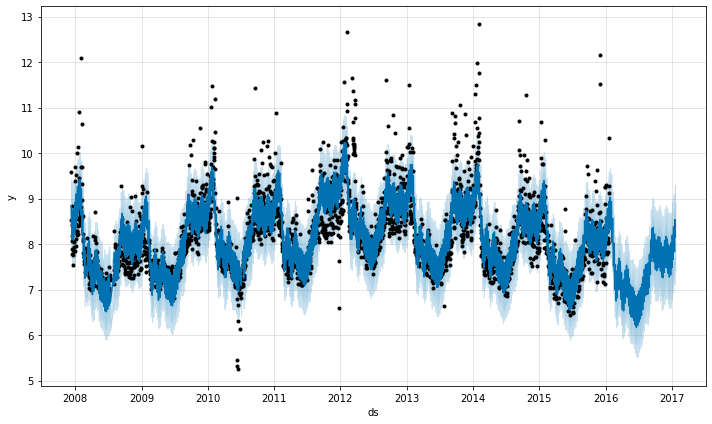

In [ ]:
fig1 = m.plot(forecast)  #Les points noirs sont les observations, le modèle bleu correspond au fit. (tracé issu de prophet.plot)

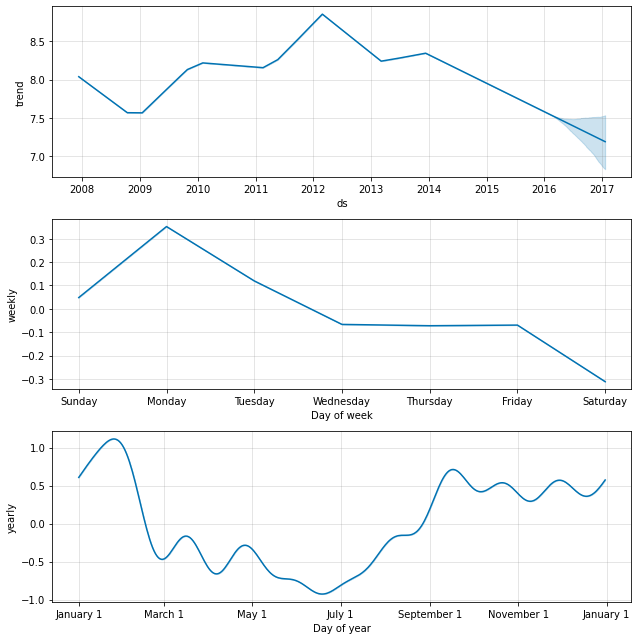

In [ ]:
fig2 = m.plot_components(forecast) #(tracé issu de prophet.plot)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)  #(tracé issu de plotly)

In [ ]:
plot_components_plotly(m, forecast) #tracé issu de plotly

In [ ]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly 

## Saturating Forecasts

Add a cap / floor (min max) to the predictions:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


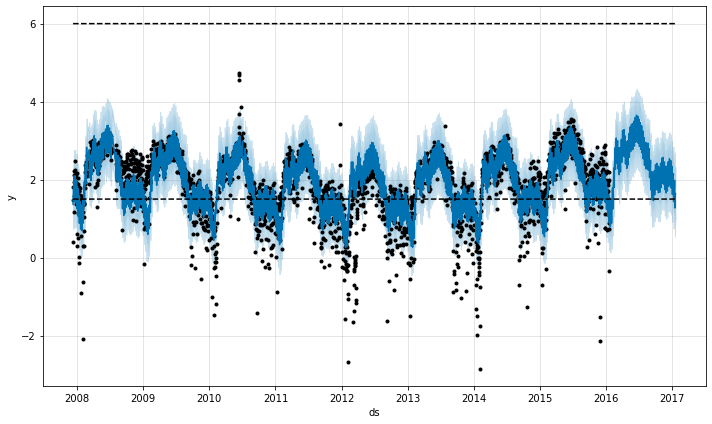

In [ ]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

## Trend Changepoints

- Prophet detects the changepoints automatically and allows the trend to adapt appropriately
- Prophet gives as well a finer control over this process

### Automatic Process

- Prophet detects the changepoints by first specifying a large number of potential changepoints, then puts a sparse prior on the magnitudes of the rate changes (~L1 Regularization).
- We can set the number of potential changepoints by using the argument `n_changepoints`
- We can use `changepoint_range` to specify where Prophet will place the changepoints (default to 0.8 ~ 80% first of the time series)
- The trend can be adjusted to be less/more flexible by using the setting changepoint_prior_scale (Increasing it will make it more flexible / wider range)

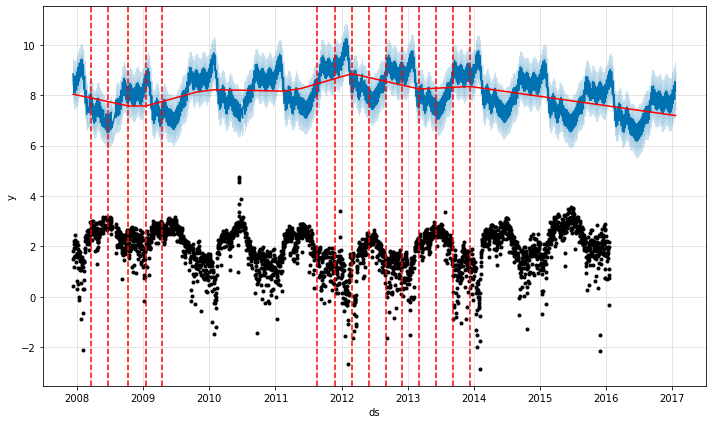

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Specifying the location of the changepoints

Specify the dates of the changes:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


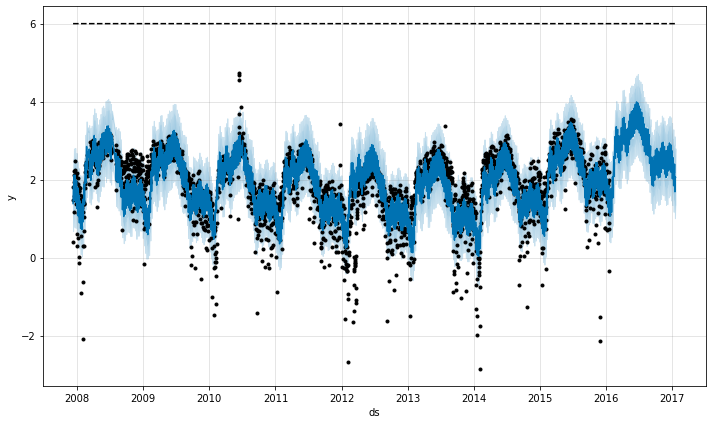

In [ ]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

## Seasonality, Holiday Effects And Regressors

### Holidays

To add holidays or other recurring events, a dataframe should be created :

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- Repeated dates will have an additional additive bonus (e.g ‘2010-02-07’)
- The holiday effect can be seen in the forecast dataframe

In [ ]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,-1.232716,-1.222628
2191,2014-02-03,-1.923157,-1.380702
2532,2015-01-11,-1.232716,0.000000
2533,2015-01-12,-1.923157,0.000000
2901,2016-01-17,-1.232716,0.000000
2902,2016-01-18,-1.923157,0.000000
2908,2016-01-24,-1.232716,0.000000
2909,2016-01-25,-1.923157,0.000000
2922,2016-02-07,-1.232716,-1.222628
2923,2016-02-08,-1.923157,-1.380702


- It can be seen as well in the forecasting components

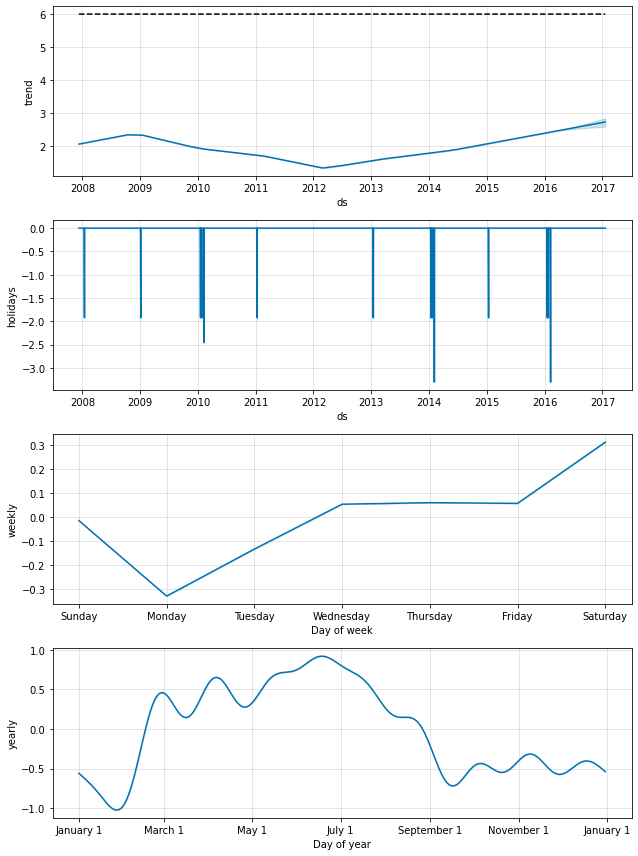

In [ ]:
fig = m.plot_components(forecast)

There are built-in collection of country specific holidays: 

In [ ]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Seasonalities

- Fourier Order for Seasonalities

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


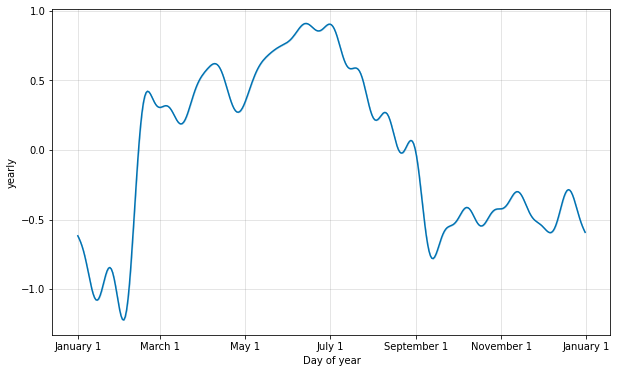

In [ ]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

- Custom Seasonalities: If the time series is more than two cycles long, prophet fits weekly and yearly seasonalities. It will also fit daily seasonality for a sub-daily time series.
- Other seasonalities can be added (name, the period of the seasonality in days, and the Fourier Order)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


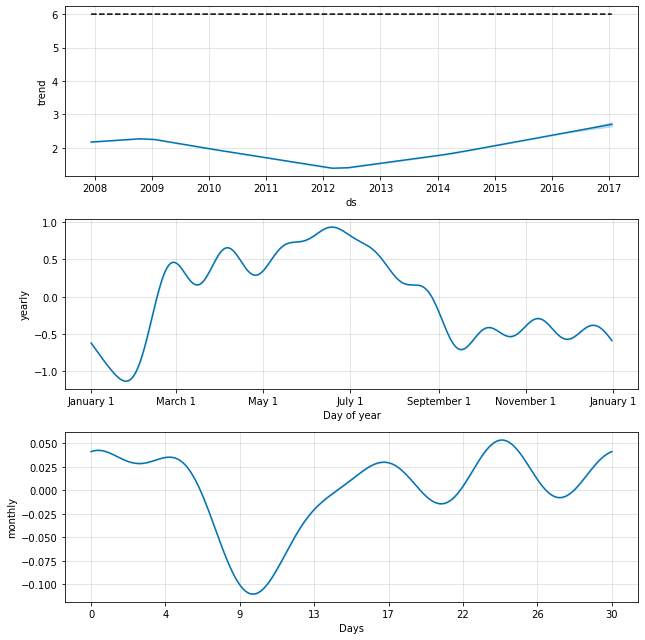

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

Custom seasonality that depends on other factors can be constructed (conditional):

In [ ]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

### **Prior scale for holidays and seasonality**

- Reducing the holidays prior scale parameter dampens the holiday effect.

In [ ]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

Available as well the for the seasonality 

In [ ]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

### Additional Regressors

- Additional regressors can be added to the linear part of the model using the `add_regressor` method or function
- A column with the regressor value will need to be present in both the fitting and prediction dataframes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


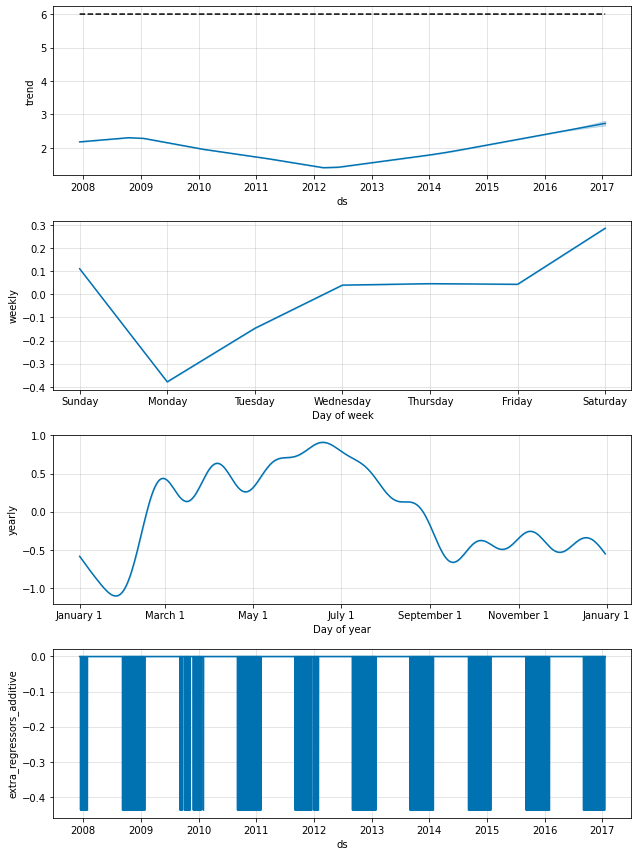

In [ ]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

- add_regressor has optional args for the prior scale and whether the regressor is standardized
- One can use another forecasting model to forecast the regressor (e.g use Prophet)
- To extract the beta coefficients of the extra regressors, use the utility function `regressor_coefficients` on the fitted model. The estimated betas roughly represent the increase in prediction value for a unit increase in the regressor value. If `mcmc_samples` is specified, a credible interval for each coefficient is also returned, which can help identify whether each regressor is “statistically significant”.

## Multiplicative Seasonality

- By default, Prophet fits additive seasonalities, meaning the seasonality is added to the trend to get the forecast
- Prophet can model multiplicative seasonality by setting `seasonality_mode='multiplicative'` in the input arguments:
With seasonality_mode='multiplicative', holiday effects will also be modeled as multiplicative but can be overridden by using the mode variable (additive/multiplicative)

## Uncertainty Intervals

There are 3 uncertainty in the forecast: uncertainty in the trend, uncertainty in the seasonality estimates, and additional observation noise 

### Uncertainty in the trend

- The potential for future trend changes
- The width of the uncertainty intervals (by default 80%) can be set using the parameter `interval_width`:

In [ ]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **Uncertainty in seasonality**

- By default Prophet will only return uncertainty in the trend and observation noise. To get uncertainty in seasonality, you must do full Bayesian sampling

In [ ]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


## Outliers

- Setting the outliers to None can improve the forecasting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


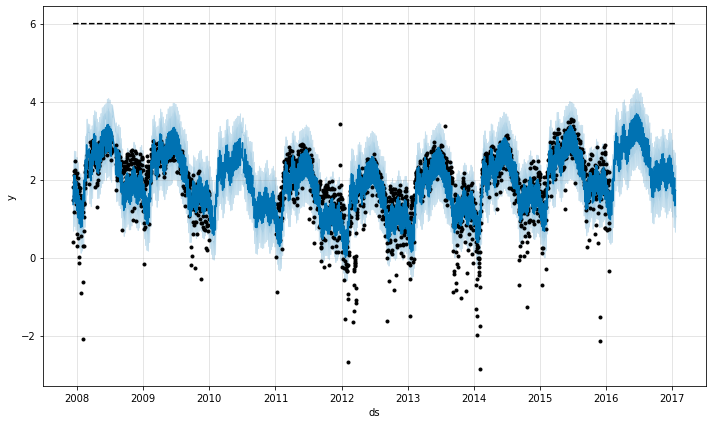

In [ ]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))

## Non-Daily Data

### Subdaily data

- Prophet can make forecasts for sub-daily observations

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


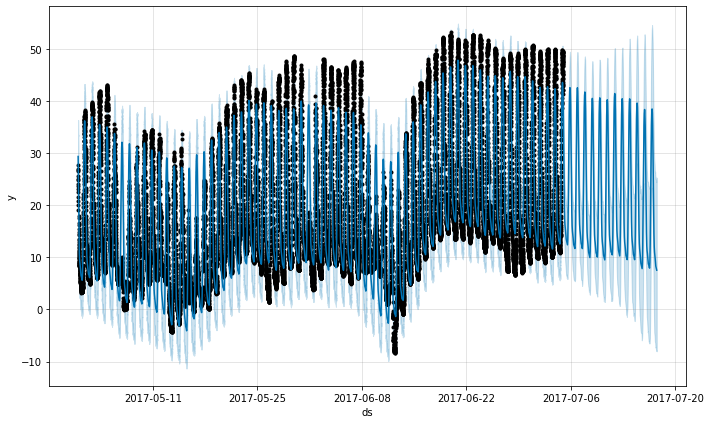

In [ ]:
df = pd.read_csv('example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

## Diagnostics

### Cross Validation